In [3]:
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

Using TensorFlow backend.
/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home

In [4]:
base_model_path = '/home/gosha20777/files/datasets/test_data/models'
labels_to_names = {0: 'Pedestrian'}
test_in_base_dir = '/home/gosha20777/files/datasets/test_data/input'
test_out_base_dir = '/home/gosha20777/files/datasets/test_data/output'

In [ ]:
# retina_resnet50_800x1333_p3_p7_full.h5

In [7]:
model_path = os.path.join(base_model_path, 'retina_resnet50_800x1333_p3_p7_full.h5')
model = models.load_model(model_path, backbone_name='resnet50')
save_base_dir = '/home/gosha20777/files/datasets/test_data/output/retina_resnet50_800x1333_p3_p7_full'
if not os.path.isdir(save_base_dir):
    os.mkdir(save_base_dir)

tracking <tf.Variable 'Variable_15:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_16:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_17:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_18:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_19:0' shape=(12, 4) dtype=float32> anchors
indices.shape[-1]: 1 <= params.rank: 2 and shape (?, 4)
indices.shape[-1]: 1 <= params.rank: 1 and shape (?,)
indices.shape[-1]: 2 <= params.rank: 2 and shape (?, 1)


In [6]:
def run_detection_image(in_filepath, out_filepath):
    image = read_image_bgr(in_filepath)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image, scale = resize_image(image)
    image = preprocess_image(image)


    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = (255, 0, 0)
        
        b = box.astype(int)
        draw_box(draw, b, color=color, thickness=5)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)
    
    draw_conv = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    cv2.imwrite(out_filepath, draw_conv)

In [19]:
tests = os.listdir(test_in_base_dir)
for test_name in tests:
    print(test_name)
    in_img_dir = os.path.join(test_in_base_dir, test_name)
    out_img_dir = os.path.join(save_base_dir, test_name)
    if not os.path.isdir(out_img_dir):
        os.mkdir(out_img_dir)
    
    for img in os.listdir(in_img_dir):
        run_detection_image(os.path.join(in_img_dir, img), os.path.join(out_img_dir, img))

burilom_test
processing time:  1.150557279586792
processing time:  1.1433758735656738
processing time:  1.200021505355835
processing time:  1.1828150749206543
processing time:  1.169442892074585
processing time:  1.1537330150604248
processing time:  1.3766810894012451
processing time:  1.1650876998901367
processing time:  1.1591458320617676
processing time:  1.1660325527191162
processing time:  1.1821784973144531
processing time:  1.1887283325195312
processing time:  1.3609373569488525
processing time:  1.7307226657867432
processing time:  1.2754895687103271
processing time:  1.1874804496765137
processing time:  1.3051395416259766
processing time:  1.472172498703003
processing time:  1.504347801208496
processing time:  1.5730493068695068
processing time:  1.5787429809570312
processing time:  1.7578182220458984
processing time:  1.3855743408203125
processing time:  1.2411766052246094
processing time:  1.3499491214752197
processing time:  1.4615378379821777
processing time:  1.2814683914

processing time:  1.291393518447876
processing time:  1.2692444324493408
processing time:  1.2719337940216064
processing time:  1.27838134765625
gpa_test
processing time:  1.2162740230560303
processing time:  1.156266689300537
processing time:  1.1548666954040527
processing time:  1.1818552017211914
processing time:  1.1780381202697754
processing time:  1.1792120933532715
processing time:  1.1045780181884766
processing time:  1.1831858158111572
processing time:  1.1579663753509521
processing time:  1.2431633472442627
processing time:  1.1654021739959717
processing time:  1.0766127109527588
processing time:  1.1839165687561035
processing time:  1.175307035446167
processing time:  1.173457145690918
processing time:  1.0836572647094727
processing time:  1.1828651428222656
processing time:  1.1549780368804932
processing time:  1.1741197109222412
processing time:  1.1692123413085938
processing time:  1.0712659358978271
processing time:  1.193664312362671
processing time:  1.1839065551757812

processing time:  1.2952609062194824
processing time:  1.5608692169189453
processing time:  1.455216884613037
processing time:  1.4202966690063477
processing time:  1.305119276046753
processing time:  1.1174592971801758
processing time:  1.4163033962249756
processing time:  1.1352808475494385
processing time:  1.144684076309204
processing time:  1.6787049770355225
processing time:  1.251373291015625
processing time:  1.6346712112426758
processing time:  1.196122407913208
processing time:  1.4449405670166016
processing time:  1.5904583930969238
processing time:  1.2742948532104492
processing time:  1.4962964057922363
processing time:  1.5830998420715332
processing time:  1.272080898284912


In [4]:
model_path = os.path.join(base_model_path, 'retina_resnet50_1500x2000_p2_p5_low_winter.h5')
model = models.load_model(model_path, backbone_name='resnet50')
save_base_dir = '/home/gosha20777/files/datasets/test_data/output/retina_resnet50_1500x2000_p2_p5_low_winter'
if not os.path.isdir(save_base_dir):
    os.mkdir(save_base_dir)

tracking <tf.Variable 'Variable:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(12, 4) dtype=float32> anchors

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
indices.shape[-1]: 1 <= params.rank: 2 and shape (?, 4)
indices.shape[-1]: 1 <= params.rank: 1 and shape (?,)
indices.shape[-1]: 2 <= params.rank: 2 and shape (?, 1)


/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
def run_detection_image1500x2000(in_filepath, out_filepath):
    image = read_image_bgr(in_filepath)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image, scale = resize_image(image, min_side=1500, max_side=2000)
    image = preprocess_image(image)


    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = (255, 0, 0)
        
        b = box.astype(int)
        draw_box(draw, b, color=color, thickness=5)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)
    
    draw_conv = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    cv2.imwrite(out_filepath, draw_conv)

tests = os.listdir(test_in_base_dir)
for test_name in tests:
    print(test_name)
    in_img_dir = os.path.join(test_in_base_dir, test_name)
    out_img_dir = os.path.join(save_base_dir, test_name)
    if not os.path.isdir(out_img_dir):
        os.mkdir(out_img_dir)
    
    for img in os.listdir(in_img_dir):
        run_detection_image1500x2000(os.path.join(in_img_dir, img), os.path.join(out_img_dir, img))

burilom_test
processing time:  5.868091821670532
processing time:  6.197806119918823
processing time:  6.253572940826416
processing time:  6.470329761505127
processing time:  6.445569038391113
processing time:  6.545700550079346
processing time:  6.808156490325928
processing time:  6.582639694213867
processing time:  6.7400171756744385
processing time:  6.938450574874878
processing time:  6.5717034339904785
processing time:  6.638738393783569
processing time:  6.609751462936401
processing time:  6.342913866043091
processing time:  6.326356649398804
processing time:  6.371284008026123
processing time:  6.414806365966797
processing time:  6.404052734375
processing time:  6.401179313659668
processing time:  6.357794284820557
processing time:  6.404855012893677
processing time:  6.368470907211304
processing time:  6.3772642612457275
processing time:  6.351396322250366
processing time:  6.326833486557007
processing time:  6.328078985214233
processing time:  6.401700735092163
processing time

processing time:  7.533881425857544
processing time:  7.581145763397217
processing time:  7.5572123527526855
processing time:  7.595402479171753
processing time:  7.653619050979614
processing time:  7.877365827560425
processing time:  8.7128324508667
processing time:  7.792884826660156
processing time:  7.749390363693237
processing time:  7.598917722702026
processing time:  7.527412176132202
processing time:  8.522378206253052
processing time:  7.603261947631836
processing time:  7.575939416885376
processing time:  7.524512529373169
processing time:  8.498006820678711
processing time:  7.572613000869751
processing time:  7.559361934661865
processing time:  7.548419952392578
processing time:  7.559063196182251
processing time:  8.46955418586731
processing time:  7.545693397521973
processing time:  7.593337774276733
processing time:  7.54344630241394
processing time:  7.555746555328369
processing time:  7.529451847076416
processing time:  7.556163549423218
processing time:  7.63169169425

processing time:  8.959896802902222
processing time:  9.055545330047607
processing time:  6.729748725891113
processing time:  9.249243974685669
processing time:  9.215079069137573
processing time:  9.01758360862732
processing time:  7.914503812789917
processing time:  9.169343948364258
processing time:  7.9587602615356445
processing time:  8.73782229423523
processing time:  8.584969520568848


In [10]:
model_path = os.path.join(base_model_path, 'retina_resnet50_1500x2000_p2_p5_low_full.h5')
model = models.load_model(model_path, backbone_name='resnet50')
save_base_dir = '/home/gosha20777/files/datasets/test_data/output/retina_resnet50_1500x2000_p2_p5_low_full'
if not os.path.isdir(save_base_dir):
    os.mkdir(save_base_dir)

tests = os.listdir(test_in_base_dir)
for test_name in tests:
    print(test_name)
    in_img_dir = os.path.join(test_in_base_dir, test_name)
    out_img_dir = os.path.join(save_base_dir, test_name)
    if not os.path.isdir(out_img_dir):
        os.mkdir(out_img_dir)
    
    for img in os.listdir(in_img_dir):
        run_detection_image1500x2000(os.path.join(in_img_dir, img), os.path.join(out_img_dir, img))

tracking <tf.Variable 'Variable_4:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_5:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_6:0' shape=(12, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_7:0' shape=(12, 4) dtype=float32> anchors
indices.shape[-1]: 1 <= params.rank: 2 and shape (?, 4)
indices.shape[-1]: 1 <= params.rank: 1 and shape (?,)
indices.shape[-1]: 2 <= params.rank: 2 and shape (?, 1)
burilom_test
processing time:  7.466105222702026
processing time:  6.649643182754517
processing time:  6.678730487823486
processing time:  6.534869194030762
processing time:  6.845395803451538
processing time:  6.739399433135986
processing time:  6.721136808395386
processing time:  6.661644458770752
processing time:  6.5625104904174805
processing time:  6.798286199569702
processing time:  6.906407117843628
processing time:  6.580578327178955
processing time:  6.647909641265869
processing time:  6.798675060272217
processing time:  6.

processing time:  6.386764287948608
processing time:  6.354162216186523
processing time:  6.328261375427246
processing time:  6.3370842933654785
processing time:  6.368459701538086
processing time:  6.320503234863281
processing time:  6.33158016204834
processing time:  6.305803537368774
processing time:  6.3331732749938965
processing time:  6.3158040046691895
processing time:  6.322996139526367
processing time:  6.350709676742554
gpa_test
processing time:  7.487821340560913
processing time:  7.493691682815552
processing time:  7.489447593688965
processing time:  7.4905359745025635
processing time:  7.5591349601745605
processing time:  7.53486180305481
processing time:  8.4197998046875
processing time:  7.48737359046936
processing time:  7.485686779022217
processing time:  7.49849009513855
processing time:  7.487157106399536
processing time:  8.564777135848999
processing time:  7.488183498382568
processing time:  7.492319107055664
processing time:  7.491577386856079
processing time:  8.

processing time:  8.939042806625366
processing time:  9.068719148635864
processing time:  8.812934398651123
processing time:  7.814413785934448
processing time:  6.64267897605896
processing time:  8.003576517105103
processing time:  9.104727983474731
processing time:  9.221182584762573
processing time:  9.287912845611572
processing time:  6.858760356903076
processing time:  8.65766429901123
processing time:  9.025009870529175
processing time:  9.400085926055908
processing time:  6.840377330780029
processing time:  8.878880500793457
processing time:  8.920928478240967
processing time:  8.943322658538818
processing time:  8.053764581680298
processing time:  9.006544589996338
processing time:  8.086037874221802
processing time:  9.119269609451294
processing time:  8.9514901638031


In [2]:
from typing import List, Optional, NamedTuple
class Rectangle(NamedTuple):
    """Хранит координаты прямоугольника (xmin, ymin) - (xmax, ymax)"""

    xmin: int
    ymin: int
    xmax: int
    ymax: int

    @property
    def w(self) -> int:
        """Ширина"""
        return self.xmax - self.xmin

    @property
    def h(self) -> int:
        """Высота"""
        return self.ymax - self.ymin

    @property
    def square(self) -> float:
        """Площадь"""
        return self.w * self.h


def image_grid(image_w: int, image_h: int,
               window_w: int, window_h: int,
               overlap_w: int, overlap_h: int) -> List[Rectangle]:
    """Рассчитывает координаты прямоугольников для разбиения изображения на блоки
    :param image_w: ширина изображения
    :param image_h: высота изображения
    :param window_w: ширина прямоугольника
    :param window_h: высота прямоугольника
    :param overlap_w: перекрытие прямоугольников по горизонтали
    :param overlap_h: перекрытие прямоугольников по вертикали
    """
    rectangles = []
    # комбинируем вертикальный и горизонтальные разрезы, чтобы получить прямоугольники
    for xmin in cut_points(image=image_w, window=window_w, overlap=overlap_w):
        for ymin in cut_points(image=image_h, window=window_h, overlap=overlap_h):
            rect = Rectangle(xmin=xmin, ymin=ymin, xmax=xmin + window_w, ymax=ymin + window_h)
            rectangles.append(rect)
    # избавляемся от повторов
    return list(set(rectangles))

def cut_points(image: int, window: int, overlap: int) -> List[int]:
    """Точки разрезов изображения (направляющие)"""
    points = []
    offset = window - overlap
    for v in range(0, image - window, offset):
        points.append(v)
    # справа и снизу остается неполный прямоугольник
    # добавим его, отсутпив справа ширину окна и сделаем еще один разрез
    points.append(image - window)
    return points

def crop_image(img, window_w: int = 416, window_h: int = 416, overlap_w: int = 150, overlap_h: int = 150):
    height_ori, width_ori = img.shape[:2]
    rects = image_grid(image_w=width_ori, image_h=height_ori,
                        window_w=window_w, window_h=window_w,
                        overlap_w=overlap_w, overlap_h=overlap_h)
    
    result = []
    for r in rects:
        crop_img = img[r.ymin:r.ymax, r.xmin:r.xmax]
        dic = {
            "rectangle": r,
            "image": crop_img 
        }
        result.append(dic)
    return result

In [6]:
img_ori_full = cv2.imread('/home/gosha20777/files/datasets/test_data/input/gpa_test/007.jpg')
result = crop_image(img_ori_full)

In [6]:
len(result)

294

In [3]:
from __future__ import division, print_function

import tensorflow as tf
import numpy as np
import argparse
import cv2

from utils.misc_utils import parse_anchors, read_class_names
from utils.nms_utils import gpu_nms
from utils.plot_utils import get_color_table, plot_one_box
from utils.data_aug import letterbox_resize

from model import yolov3

anchors = parse_anchors('./data/yolo_anchors.txt')
classes = read_class_names('./data/coco.names')
num_class = len(classes)
color_table = get_color_table(num_class)

img_orig = cv2.imread('/home/gosha20777/files/datasets/test_data/input/gpa_test/007.jpg')
images = crop_image(img_orig)

with tf.Session() as sess:
    input_data = tf.placeholder(tf.float32, [1, 416, 416, 3], name='input_data')
    yolo_model = yolov3(num_class, anchors)
    with tf.variable_scope('yolov3'):
        pred_feature_maps = yolo_model.forward(input_data, False)
    pred_boxes, pred_confs, pred_probs = yolo_model.predict(pred_feature_maps)

    pred_scores = pred_confs * pred_probs

    boxes, scores, labels = gpu_nms(pred_boxes, pred_scores, num_class, max_boxes=200, score_thresh=0.3, nms_thresh=0.45)

    saver = tf.train.Saver()
    saver.restore(sess, './data/darknet_weights/best_model_Epoch_44_step_19574_mAP_0.7138_loss_2.1660_lr_3e-05')

    i = 0
    for img in images:
        im = img['image']
        im, resize_ratio, dw, dh = letterbox_resize(im, 416, 416)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im = np.asarray(im, np.float32)
        im = im[np.newaxis, :] / 255.
    
        
        boxes_, scores_, labels_ = sess.run([boxes, scores, labels], feed_dict={input_data: im})
        if len(boxes_) > 0:
            print("box coords:", boxes_)
            print(img['rectangle'])
            print(i)
        
        i = i + 1

/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gosha20777/anaconda3/envs/tf-1-14/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gosha20777/anaconda3/envs

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./data/darknet_weights/best_model_Epoch_44_step_19574_mAP_0.7138_loss_2.1660_lr_3e-05
box coords: [[208.75235 202.4884  231.9318  266.50262]]
Rectangle(xmin=4788, ymin=798, xmax=5204, ymax=1214)
36
box coords: [[169.6001  148.28253 175.53748 158.85217]]
Rectangle(xmin=1330, ymin=1330, xmax=1746, ymax=1746)
46
box coords: [[109.039734 177.77577  116.62778  186.05696 ]]
Rectangle(xmin=3724, ymin=1064, xmax=4140, ymax=1480)
50
box coords: [[114.40671  85.44954 145.10373 168.17638]]
Rectangle(xmin=3458, ymin=1064, xmax=3874, ymax=1480)
183


In [3]:
print(images[0]['image'].shape)

(416, 416, 3)


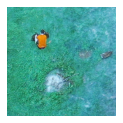

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(images[183]['image'])
plt.show()